In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
f = open('../data/U00096.fna')
lines = f.readlines()
#ignoring the first line and concat everything to make a strand
lines1 = [i.strip() for i in lines[1:]]
strand = ''
for i in lines1:
    strand+=i

In [3]:
len(strand)

4639675

In [4]:
stop_codons = ['TAG', 'TAA', 'TGA']

In [5]:
prev_start = 0
dist_offset1 = {}
num_orfs = 0
for i in range(0,len(strand),3):
    if strand[i:i+3] in stop_codons:
        l = (i-prev_start)/3
        prev_start = i+3
        if l in dist_offset1:
            dist_offset1[l] += 1
        else:
            dist_offset1[l] = 1
        num_orfs +=1

Text(0,0.5,'normalised log frequency')

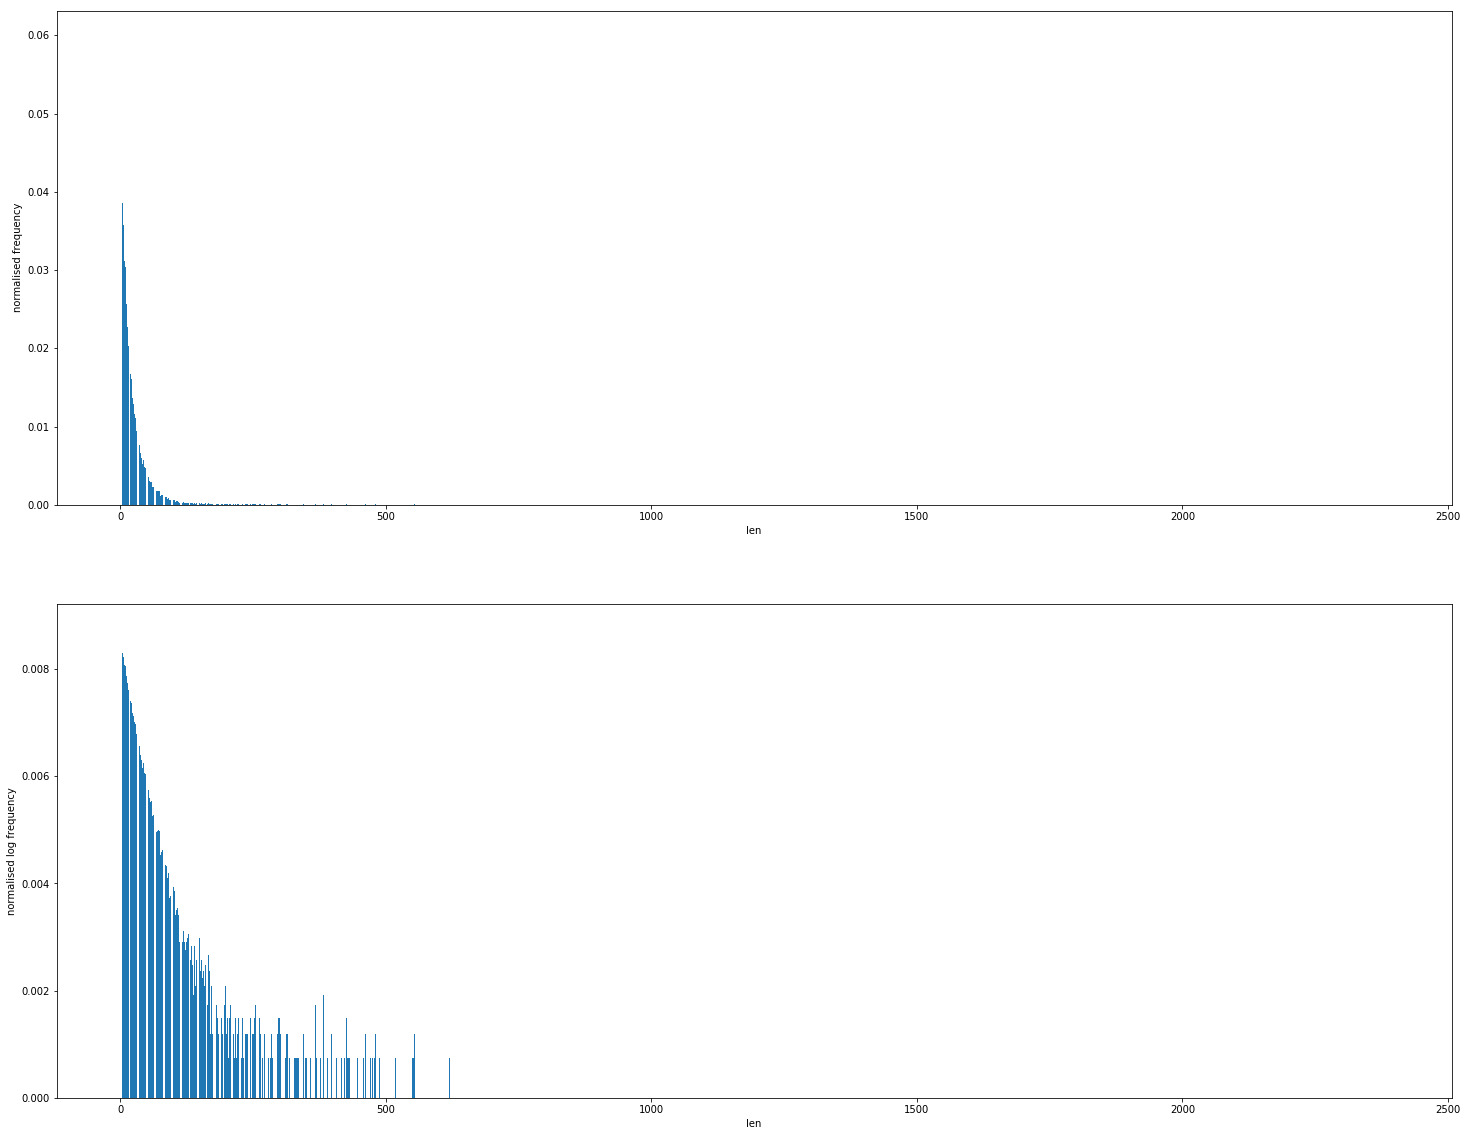

In [9]:
x1= sorted(dist_offset1.keys())
# print('x1_len : ', x1_len)
y1 = np.array([dist_offset1[i] for i in x1])
# print('y1 : ', y1)
logy1 = np.log(y1)
# print('logy1 : ', logy1)

plt.figure(figsize=(25,20))
plt.subplot(211)
plt.bar(x1, y1/np.sum(y1))
plt.xlabel('len')
plt.ylabel('normalised frequency')
plt.subplot(212)
plt.bar(x1, logy1/np.sum(logy1))
plt.xlabel('len')
plt.ylabel('normalised log frequency')

In [10]:
prev_start = 1
dist_offset2 = {}
for i in range(1,len(strand),3):
    if strand[i:i+3] in stop_codons:
        l = (i-prev_start)/3
        prev_start = i+3
        if l in dist_offset2:
            dist_offset2[l] += 1
        else:
            dist_offset2[l] = 1

Text(0,0.5,'normalised log frequency')

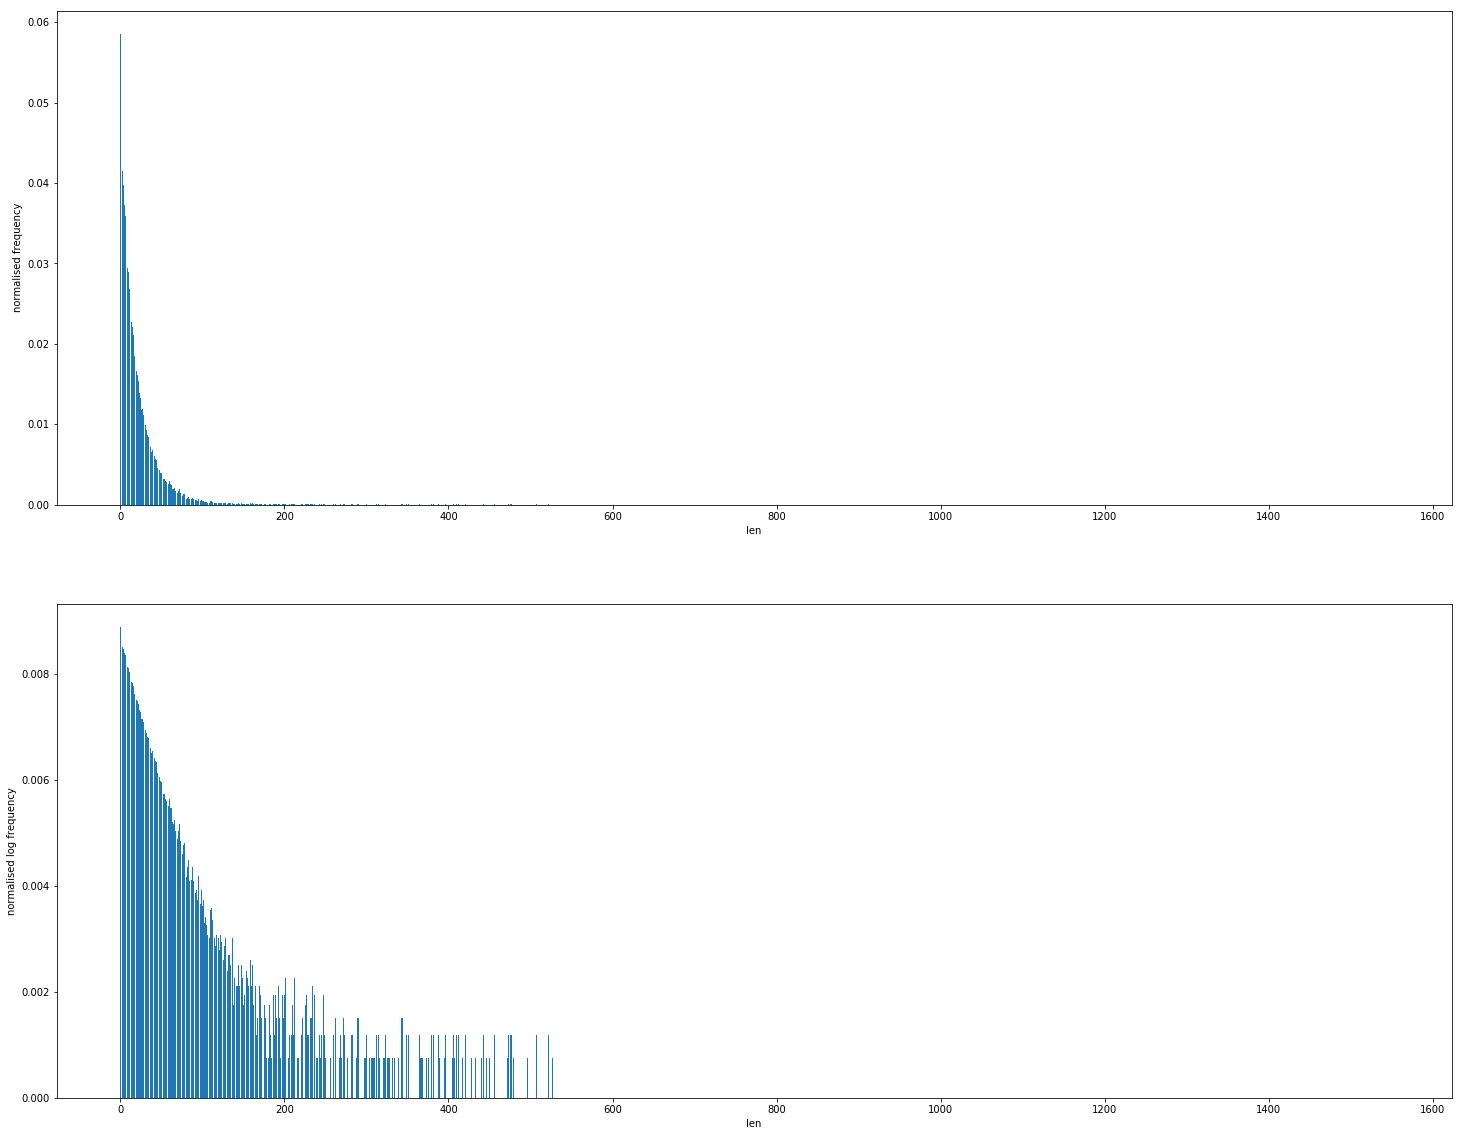

In [11]:
x2 = sorted(dist_offset2.keys())
y2 = np.array([dist_offset2[i] for i in x2])
logy2 = np.log(y2)

plt.figure(figsize=(25,20))
plt.subplot(211)
plt.bar(x2, y2/np.sum(y2))
plt.xlabel('len')
plt.ylabel('normalised frequency')
plt.subplot(212)
plt.bar(x2, logy2/np.sum(logy2))
plt.xlabel('len')
plt.ylabel('normalised log frequency')

In [12]:
prev_start = 2
dist_offset3 = {}
for i in range(2,len(strand),3):
    if strand[i:i+3] in stop_codons:
        l = (i-prev_start)/3
        prev_start = i+3
        if l in dist_offset3:
            dist_offset3[l] += 1
        else:
            dist_offset3[l] = 1

Text(0,0.5,'normalised log frequency')

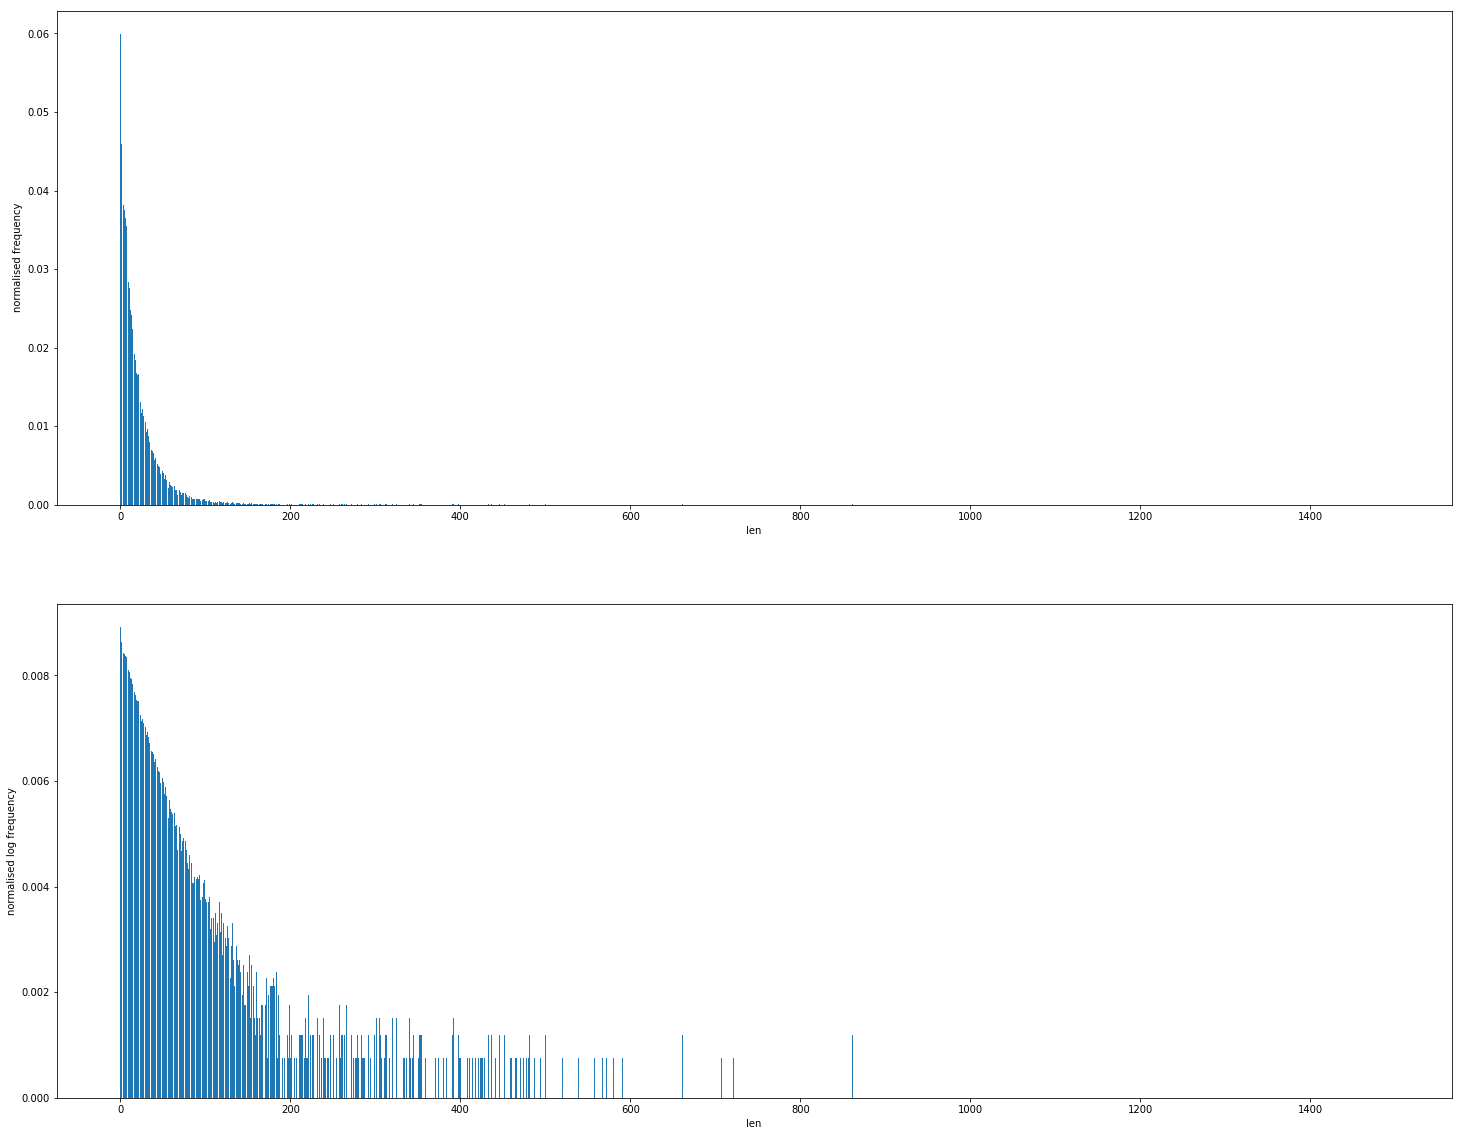

In [13]:
x3 = sorted(dist_offset3.keys())
y3 = np.array([dist_offset3[i] for i in x3])
logy3 = np.log(y3)

plt.figure(figsize=(25,20))
plt.subplot(211)
plt.bar(x3, y3/np.sum(y3))
plt.xlabel('len')
plt.ylabel('normalised frequency')
plt.subplot(212)
plt.bar(x3, logy3/np.sum(logy3))
plt.xlabel('len')
plt.ylabel('normalised log frequency')

Text(0,0.5,'frequency')

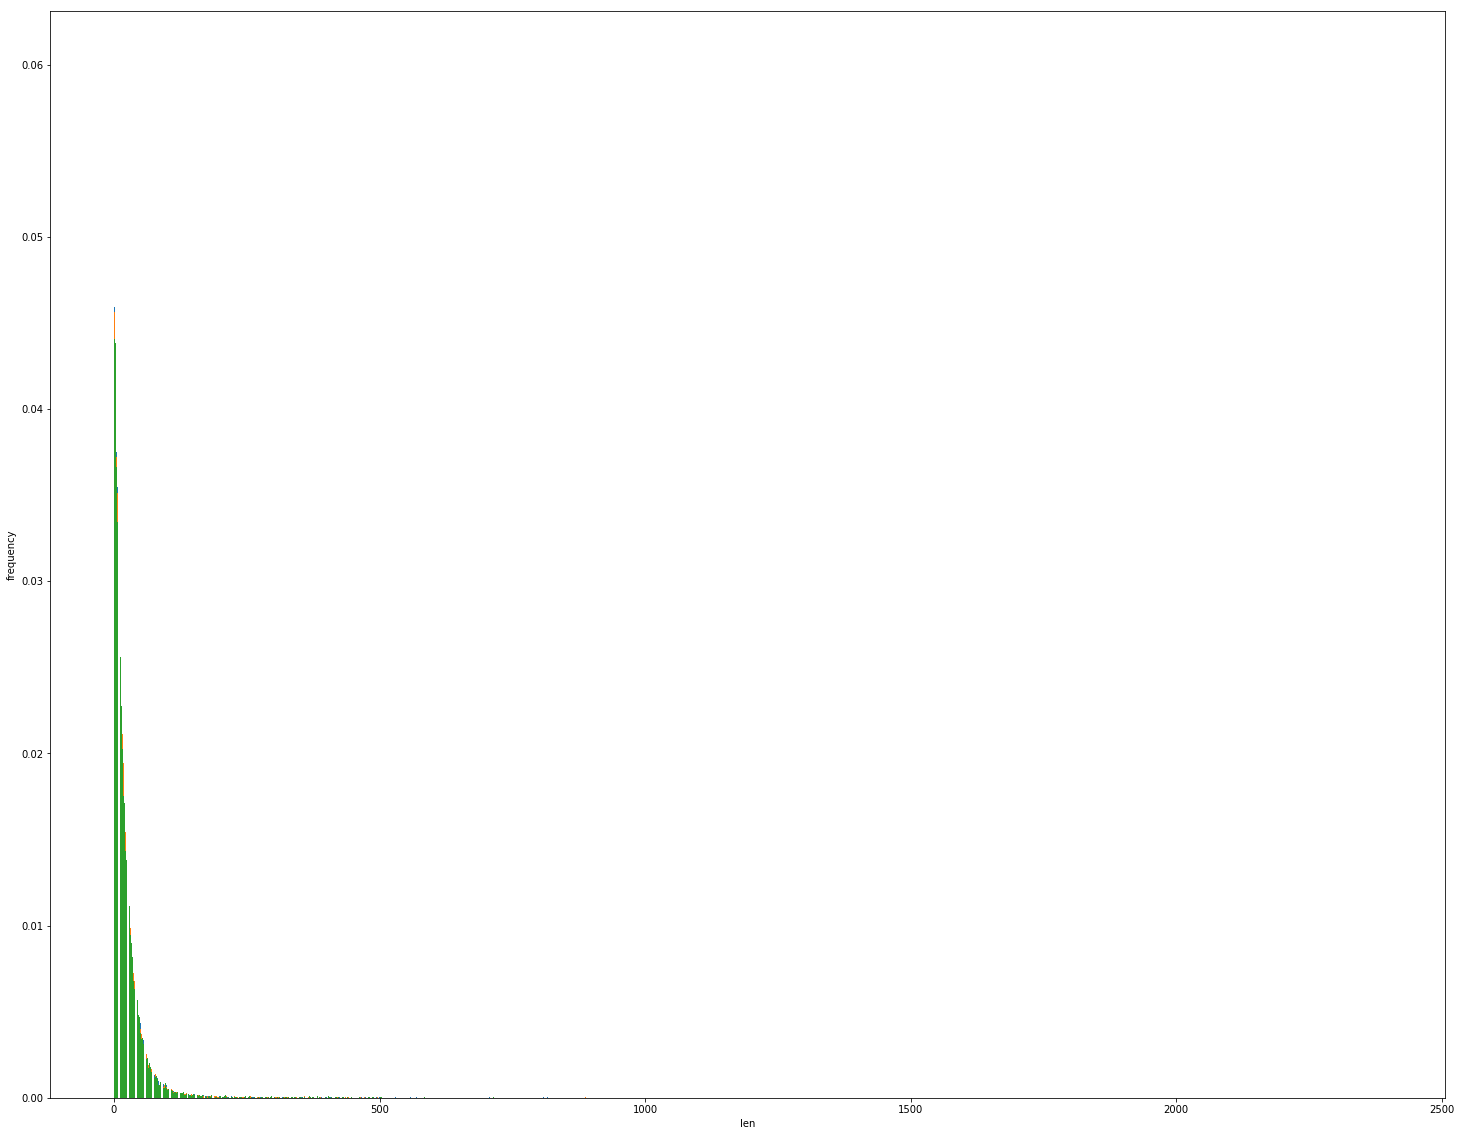

In [14]:
plt.figure(figsize=(25,20))
# plt.subplot(211)
plt.bar(x3, y3/np.sum(y3))
plt.bar(x2, y2/np.sum(y2))
plt.bar(x1, y1/np.sum(y1))
plt.xlabel('len')
plt.ylabel('frequency')
# plt.subplot(212)
# plt.plot(x3, logy3, 'ro')
# plt.plot(x2, logy2, 'bo')
# plt.plot(x1_len, logy1, 'go')
# plt.xlabel('len')
# plt.ylabel('log frequency')

# Theoretical distribution

In [16]:
import numpy as np
N = 5*(10**6)
def prob_l1(l):
    return num_orfs*((61/64)**l)*(3/64)
def prob_l2(l):
    return (N - 3*l - 3)*((61/64)**l)*(3/64)

l_array = np.array([i+1 for i in range(2500)])
probl = np.array([prob_l2(l) for l in l_array])
norm_probl = probl/np.sum(probl)

Text(0,0.5,'log frequency')

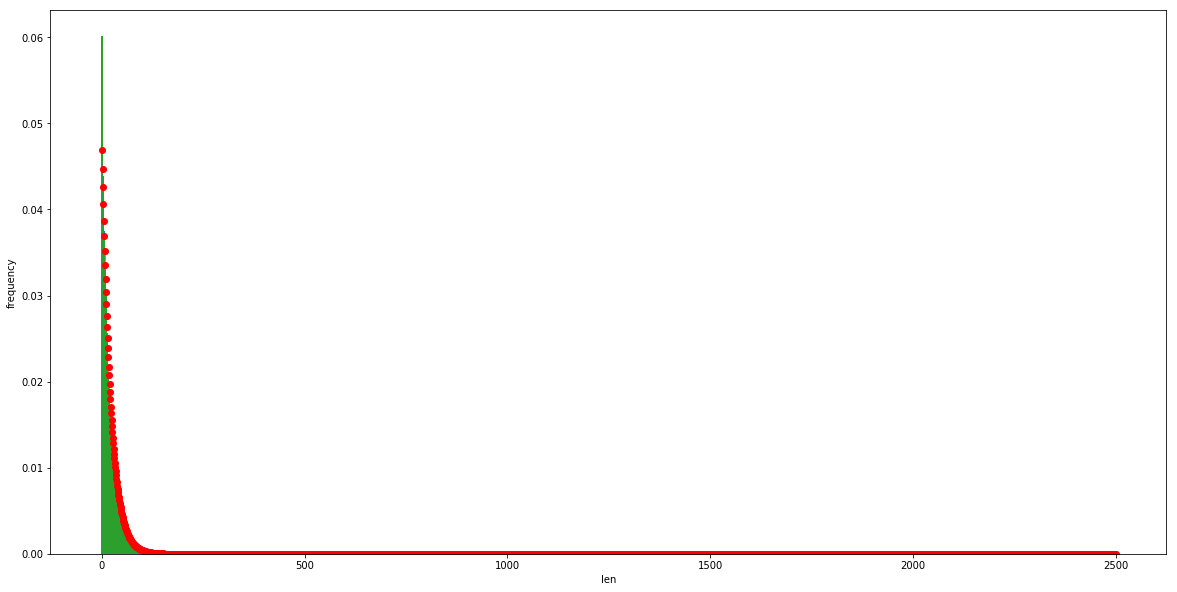

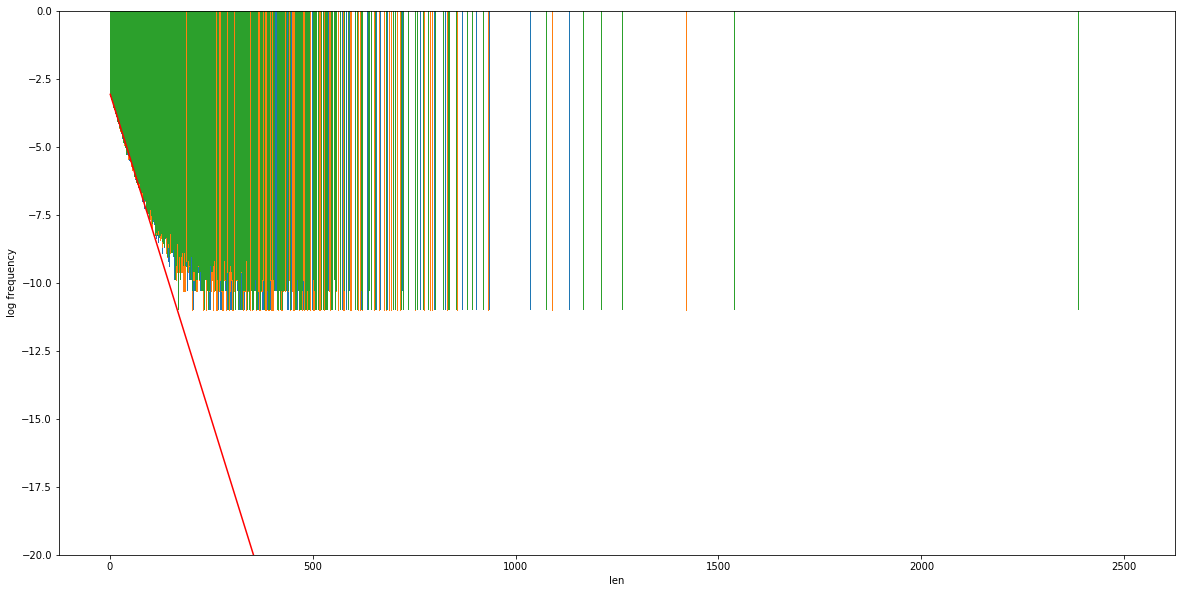

In [22]:
plt.figure(figsize=(20,10))
# plt.figure(figsize=(25,20))
# plt.subplot(211)
plt.bar(x3, y3/np.sum(y3), width=4)
plt.bar(x2, y2/np.sum(y2), width=4)
plt.bar(x1, y1/np.sum(y1), width=4)
plt.plot(l_array, norm_probl, 'ro')
# low = min(y1)
# high = max(y1)
# plt.ylim([0,10])
plt.xlabel('len')
plt.ylabel('frequency')


plt.figure(figsize=(20,10))
# plt.figure(figsize=(25,20))
# plt.subplot(211)
plt.bar(x3, np.log(y3/np.sum(y3)), width=1)
plt.bar(x2, np.log(y2/np.sum(y2)), width=1)
plt.bar(x1, np.log(y1/np.sum(y1)), width=1)
plt.plot(l_array, np.log(norm_probl), 'r-')
# low = min(y1)
# high = max(y1)
plt.ylim([-20,0])
plt.xlabel('len')
plt.ylabel('log frequency')